Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2022/2023  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Prva laboratorijska vježba: Linearna regresija

*Verzija: 1.0
Zadnji put ažurirano: 1. 10. 2021.*

(c) 2015-2022 Jan Šnajder, Domagoj Alagić 

Rok za predaju: **23. listopada 2022. u 23:59h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od sedam zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [2]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

In [3]:
print(f"X:\n{X}\n")
print(f"y:\n{y}")

X:
[[0]
 [1]
 [2]
 [4]]

y:
[4 1 2 5]


### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [4]:
from sklearn.preprocessing import PolynomialFeatures
# Vaš kôd ovdje
poly = PolynomialFeatures(degree=1)
phi_1a = poly.fit_transform(X)
print(f"phi:\n{phi_1a}")

phi:
[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 4.]]


### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [5]:
from numpy import linalg
# Vaš kôd ovdje

# first w
phi_transposed = np.transpose(phi_1a)
print(f"phi_transposed:\n{phi_transposed}\n")
first_product = np.dot(phi_transposed, phi_1a)
print(f"first_product:\n{first_product}\n")
inversed = linalg.inv(first_product)
print(f"inversed:\n{inversed}\n")

w_1b_1 = np.dot(np.dot(inversed, phi_transposed), y)
print(f"w 1:\n{w_1b_1}\n")

# second w
pinv = linalg.pinv(phi_1a)
print(f"pseudo-inverse:\n{pinv}\n")

w_1b_2 = np.dot(pinv, y)
print(f"w 2:\n{w_1b_2}")

assert(np.allclose(w_1b_1, w_1b_2))

phi_transposed:
[[1. 1. 1. 1.]
 [0. 1. 2. 4.]]

first_product:
[[ 4.  7.]
 [ 7. 21.]]

inversed:
[[ 0.6        -0.2       ]
 [-0.2         0.11428571]]

w 1:
[2.2        0.45714286]

pseudo-inverse:
[[ 0.6         0.4         0.2        -0.2       ]
 [-0.2        -0.08571429  0.02857143  0.25714286]]

w 2:
[2.2        0.45714286]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}^{(i)}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

In [6]:
from sklearn.metrics import mean_squared_error
# Vaš kôd ovdje


w = w_1b_2
x = phi_1a

h_1c = np.dot(x, w)
print(f"h:\n{h_1c}\n")

E_1c = mean_squared_error(y, h_1c)
print(f"E: {E_1c}")

h:
[2.2        2.65714286 3.11428571 4.02857143]

E: 2.0428571428571427


### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [7]:
# Vaš kôd ovdje
#phi_inv = linalg.inv(phi_1a)

### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Provjerite jesu li težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Ako nisu, prilagodite kôd tako da jest.

**NB:** Obratite pozornost na to kako klase [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) i [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) koriste pomak i osigurajte da ga ne dodajete više puta.

Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [8]:
from sklearn.linear_model import LinearRegression
# Vaš kôd ovdje

reg = LinearRegression().fit(phi_1a, y)
w1 = reg.coef_[1]
w0 = reg.intercept_
w = [w0, w1]
print(f"w:\n{w}\n")

h_1e = reg.predict(phi_1a)
print(f"h: \n{h_1e}\n")
assert(np.allclose(h_1c, h_1e))

E_1e = mean_squared_error(y, h_1e)
print(f"E: {E_1e}")

assert(E_1c == E_1e)

w:
[2.2, 0.457142857142857]

h: 
[2.2        2.65714286 3.11428571 4.02857143]

E: 2.0428571428571427


### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [9]:
from numpy.random import normal
def make_labels(X, f, noise=0):
    # Vaš kôd ovdje
    y = f(X) + normal(0, noise, len(X))
    return y

In [10]:
def make_instances(x1, x2, N) :
    return np.array([np.array(x) for x in np.linspace(x1,x2,N)])

In [11]:
# Vaš kôd ovdje
def f(x):
    y = 5 + x - 2 * x**2 - 5 * x**3
    return y

N = 50
sigma_noise = 200
x1 = -5
x2 = 5
X_2a = make_instances(x1, x2, N)
y_2a = make_labels(X_2a, f, sigma_noise)

Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

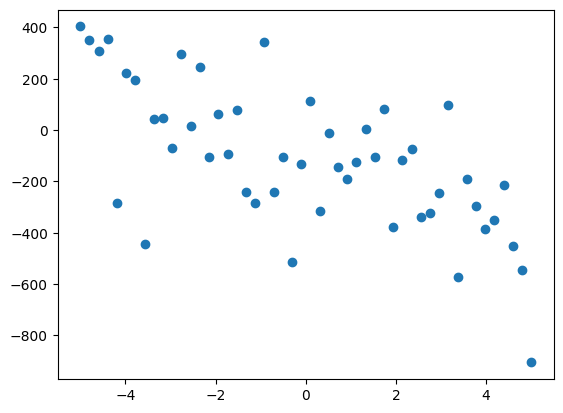

In [12]:
# Vaš kôd ovdje
plt.scatter(X_2a, y_2a)

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

E: 36896.273389213595


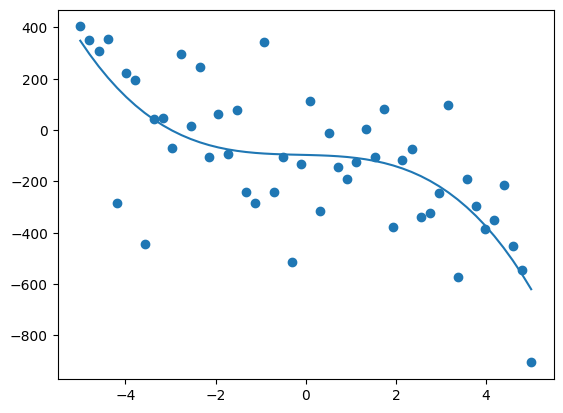

In [13]:
# Vaš kôd ovdje
poly = PolynomialFeatures(degree=3)
phi = poly.fit_transform(X_2a.reshape(-1, 1))

# w
pinv = linalg.pinv(phi)
w = np.dot(pinv, y_2a)

# h
x = phi
h = np.dot(x, w)

# E
E = mean_squared_error(y_2a, h)
print(f"E: {E}")

# graph
plt.scatter(X_2a, y_2a)
plt.plot(X_2a, h)

### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

E for degree=1: 42550.73017427542
E for degree=3: 36896.273389213595
E for degree=5: 34894.29702531281
E for degree=10: 30545.97226837134
E for degree=20: 28463.63956078346


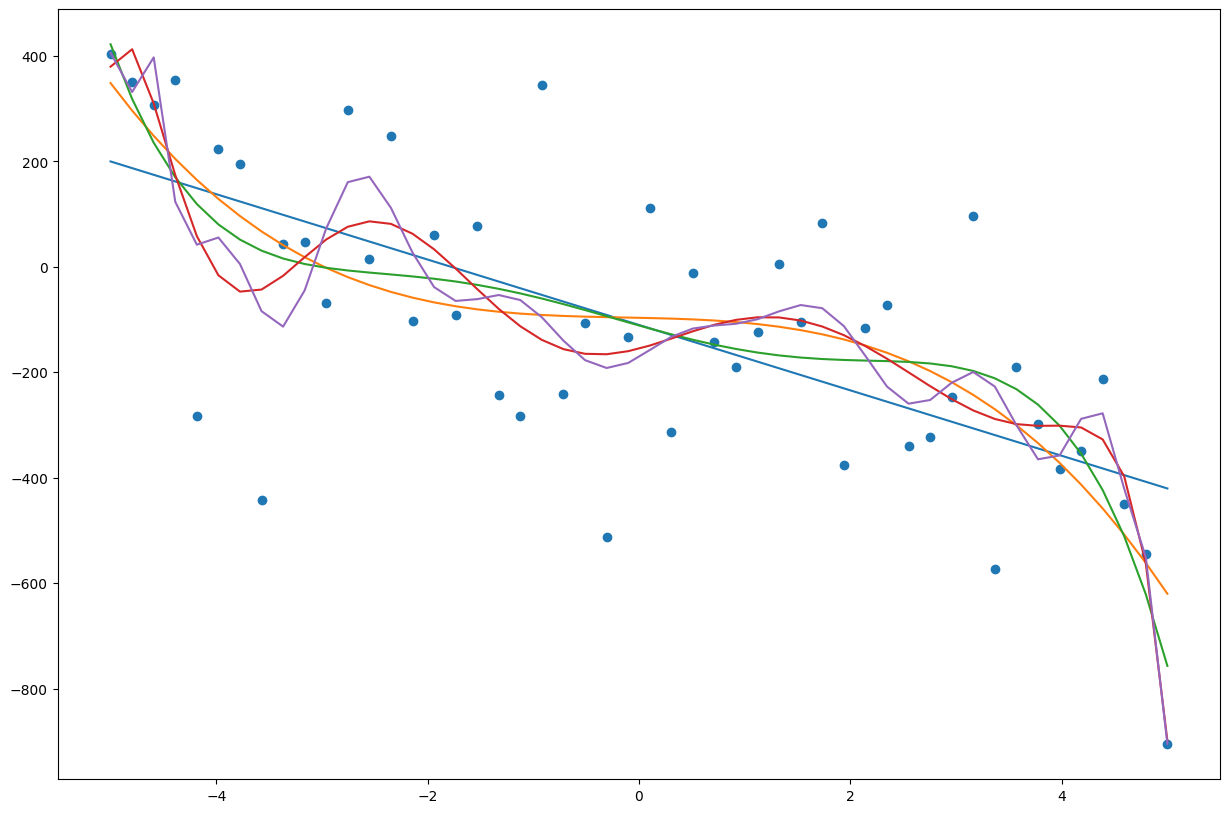

In [14]:
# Vaš kôd ovdje
assert(size(X_2a) == 50)
assert(size(y_2a) == 50)

degrees_list = [1, 3, 5, 10, 20]

# show original data
plt.figure(figsize=(15,10))
plt.scatter(X_2a, y_2a)

# train for each degree
for d in degrees_list:
    # polynomial function
    poly = PolynomialFeatures(degree=d)
    phi = poly.fit_transform(X_2a.reshape(-1, 1))
    
    # w
    pinv = linalg.pinv(phi)
    w = np.dot(pinv, y_2a)
    
    # h (x = phi)
    h = np.dot(phi, w)
    
    # E
    E = mean_squared_error(y_2a, h)
    
    # print
    print(f"E for degree={d}: {E}")
    
    # show train chart
    plt.plot(X_2a, h)

### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih dvadeset modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

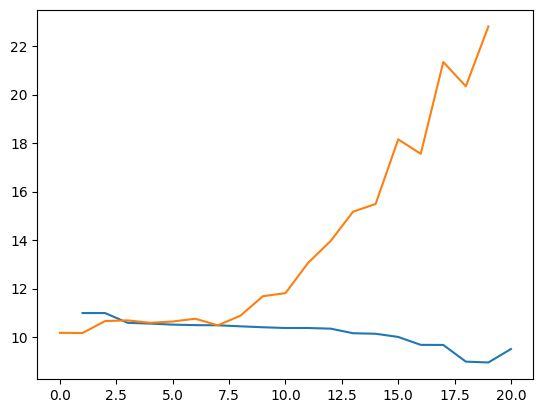

In [15]:
from sklearn.model_selection import train_test_split
# Vaš kôd ovdje
assert(size(X_2a) == 50)
assert(size(y_2a) == 50)

X_train, X_test, y_train, y_test = train_test_split(X_2a, y_2a, test_size=0.5, random_state=42)

assert(size(X_train) == size(X_test))
assert(size(X_train) == 25)

degrees_list = [i for i in range(1, 21)]
E_train_list = list()
E_test_list = list()

for d in degrees_list:
    # polynomial function
    poly = PolynomialFeatures(degree=d)
    phi_train = poly.fit_transform(X_train.reshape(-1, 1))
    phi_test = poly.fit_transform(X_test.reshape(-1, 1))
    
    # w
    w_train = np.dot(linalg.pinv(phi_train), y_train)
    
    # h (x = phi)
    h_train = np.dot(phi_train, w_train)
    h_test = np.dot(phi_test, w_train)
    
    # E
    E_train = np.log(mean_squared_error(y_train, h_train))
    E_train_list.append(E_train)
    E_test = np.log(mean_squared_error(y_test, h_test))
    E_test_list.append(E_test)
    
# display E
plt.plot(degrees_list, E_train_list, E_test_list)

### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

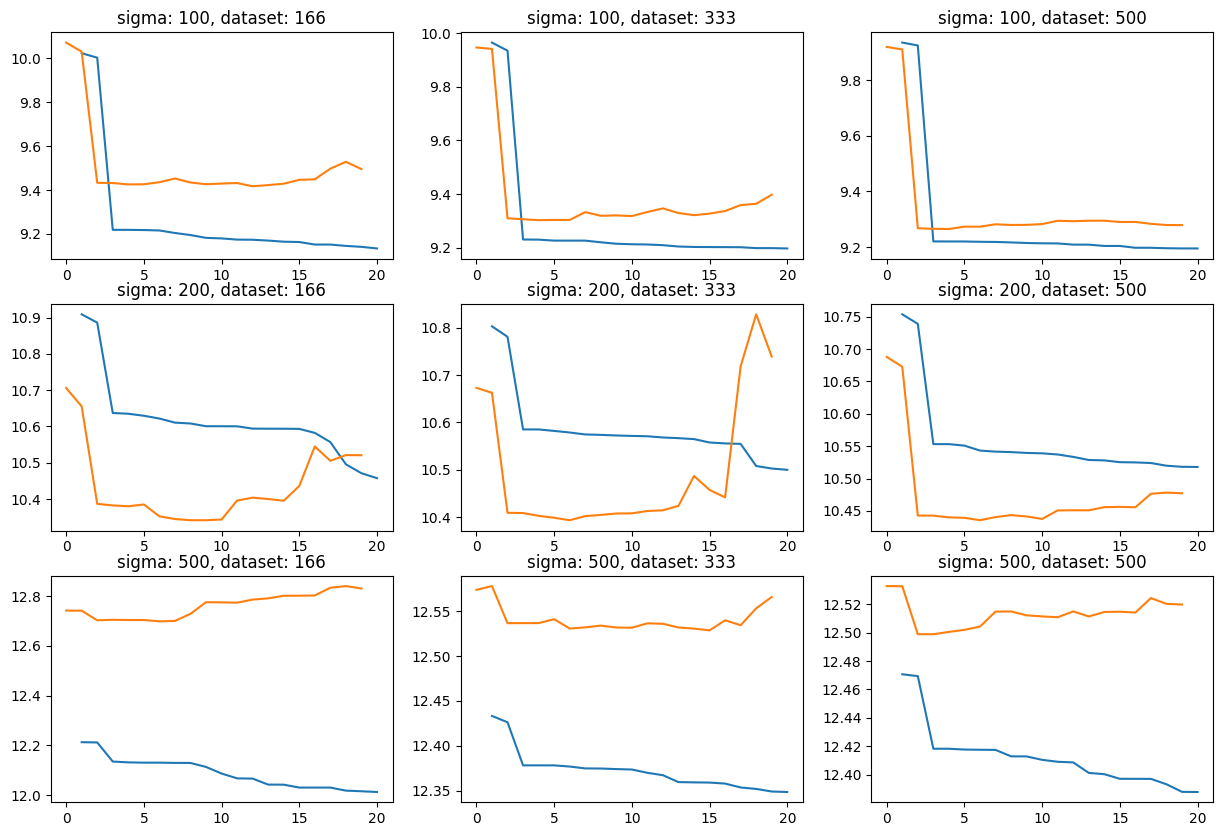

In [16]:
# Vaš kôd ovdje
N = 1000
N_split_list = [1/3, 2/3, 1]
degrees_list = [i for i in range(1, 21)]
sigma_noise_list = [100, 200, 500]
x1 = -5
x2 = 5

# create X
X_3c = make_instances(x1, x2, N)
assert(size(X_3c) == 1000)

# split train and test X
X_train, X_test = train_test_split(X_3c, test_size=0.5, random_state=42)
X_split_size = size(X_train)
assert(size(X_train) == 500)
assert(size(X_test) == 500)

# prepare plot
fig, axs = plt.subplots(3, 3, figsize=(15, 10))
ax_x = 0
ax_y = 0

# try different noises
for noise in sigma_noise_list:
    # y train and test for every noise
    y_train = make_labels(X_train, f, noise)
    y_test = make_labels(X_test, f, noise)
    assert(size(y_train) == 500)
    assert(size(y_test) == 500)
    
    # try different dataset sizes
    for split in N_split_list:
        # split X train and test list into chunks
        n_size = int(X_split_size * split)        
        X_train_temp = X_train[:n_size] 
        X_test_temp = X_test[:n_size]
        y_train_temp = y_train[:n_size]
        y_test_temp = y_test[:n_size]
        assert(size(X_train_temp) == n_size)
        assert(size(X_test_temp) == n_size)
        assert(size(y_train_temp) == n_size)
        assert(size(y_test_temp) == n_size)
        
        # calculate E for each degree
        E_train_list = list()
        E_test_list = list()
        
        # different degrees
        for d in degrees_list:
            # polynomial function and E
            poly = PolynomialFeatures(degree=d)
            phi_train = poly.fit_transform(X_train_temp.reshape(-1, 1))
            phi_test = poly.fit_transform(X_test_temp.reshape(-1, 1))
            w_train = np.dot(linalg.pinv(phi_train), y_train_temp)
            h_train = np.dot(phi_train, w_train)
            h_test = np.dot(phi_test, w_train)
            # E
            E_train = np.log(mean_squared_error(y_train_temp, h_train))
            E_train_list.append(E_train)
            E_test = np.log(mean_squared_error(y_test_temp, h_test))
            E_test_list.append(E_test)
            
        # show plots
        axs[ax_x, ax_y].plot(degrees_list, E_train_list, E_test_list)
        axs[ax_x, ax_y].set_title(f"sigma: {noise}, dataset: {n_size}")
        
        # move plot to next row
        ax_y += 1
        
    # move plot to next column and reset row
    ax_x += 1
    ax_y = 0

***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [17]:
# Vaš kôd ovdje
assert(size(X) == 4)
assert(size(y) == 4)

lambda_list_4a = [0, 1, 10]

poly = PolynomialFeatures(degree=3)
phi_4a = poly.fit_transform(X)

for lam in lambda_list_4a:
    phi_transposed = np.transpose(phi_4a)
    prod1 = np.dot(phi_transposed, phi_4a)
    
    I_matrix = np.eye(4)
    I_matrix[0][0] = 0
    sum1 = prod1 + np.dot(lam, I_matrix)
    sum1_inv = np.linalg.inv(sum1)
    
    prod2 = np.dot(sum1_inv, phi_transposed)
    prod_final = np.dot(prod2, y)
    
    w = prod_final
    print(f"w for lambda={lam}: {w}")

w for lambda=0: [ 4.         -5.91666667  3.375      -0.45833333]
w for lambda=1: [ 3.05696145 -0.69079365 -0.2831746   0.1445805 ]
w for lambda=10: [ 2.49444184 -0.15897295 -0.13423067  0.0815601 ]


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`). Ponovno, pripazite na pomak.

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [18]:
from sklearn.linear_model import Ridge
# Vaš kôd ovdje
assert(size(y) == 4)

for alpha in lambda_list_4a:
    ridge = Ridge(alpha=alpha)
    fitted = ridge.fit(phi_4a, y)
    print(f"alpha={alpha}, w: {fitted.intercept_}, {fitted.coef_}")

alpha=0, w: 3.9999999999999645, [ 0.         -5.91666667  3.375      -0.45833333]
alpha=1, w: 3.0569614512471652, [ 0.         -0.69079365 -0.2831746   0.1445805 ]
alpha=10, w: 2.494441843122973, [ 0.         -0.15897295 -0.13423067  0.0815601 ]


### (c)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

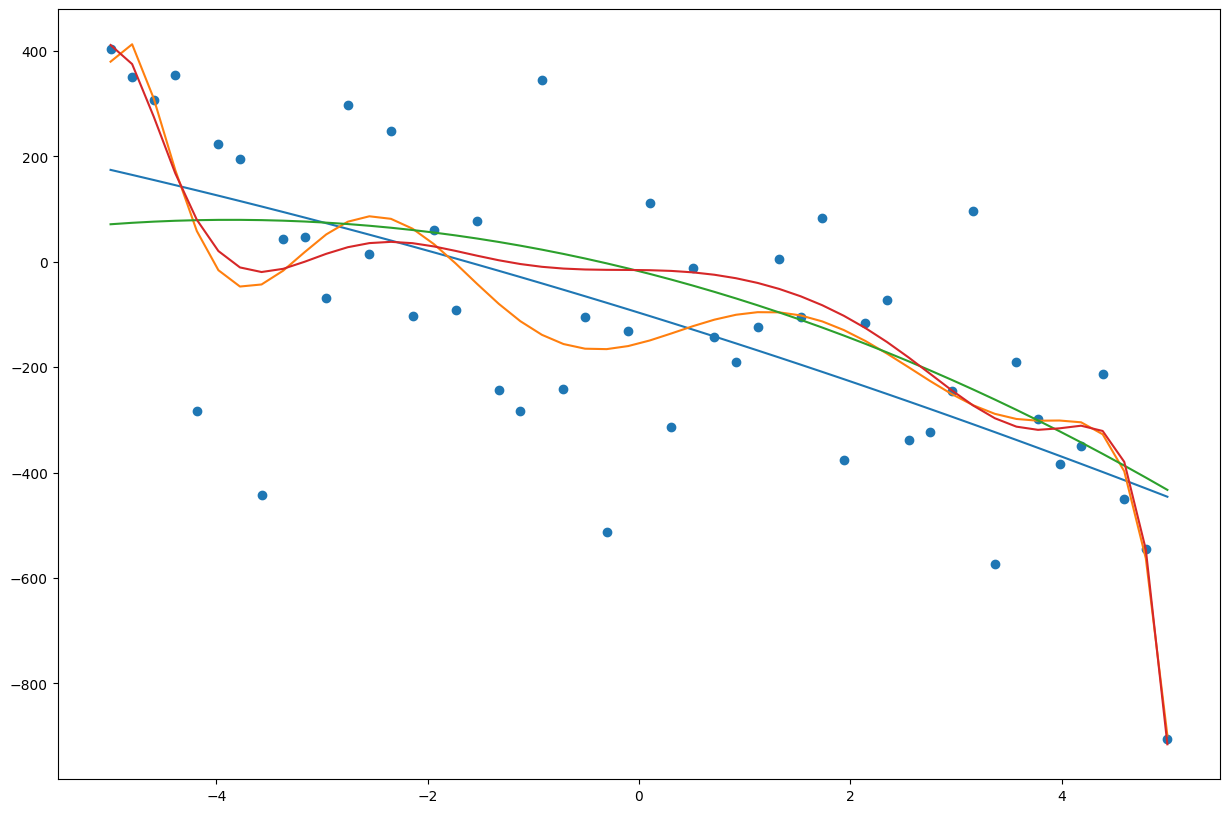

In [19]:
# Vaš kôd ovdje
assert(size(X_2a) == 50)
assert(size(y_2a) == 50)

lambda_list_4c = [0, 100]
d_list_4c = [2, 10]

plt.figure(figsize=(15,10))
plt.scatter(X_2a, y_2a)

for lam in lambda_list_4c:
    for d in d_list_4c:
        # polynomial function
        poly = PolynomialFeatures(degree=d)
        phi = poly.fit_transform(X_2a.reshape(-1, 1))

        # w
        phi_transposed = np.transpose(phi)
        prod1 = np.dot(phi_transposed, phi)
        I_matrix = np.eye(d + 1)
        sum1 = prod1 + np.dot(lam, I_matrix)
        sum1_inv = np.linalg.inv(sum1)
        prod2 = np.dot(sum1_inv, phi_transposed)
        w = np.dot(prod2, y_2a)
        
        # h = wT * x; x = phi
        h = np.dot(phi, w)
        plt.plot(X_2a, h)

### (d)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


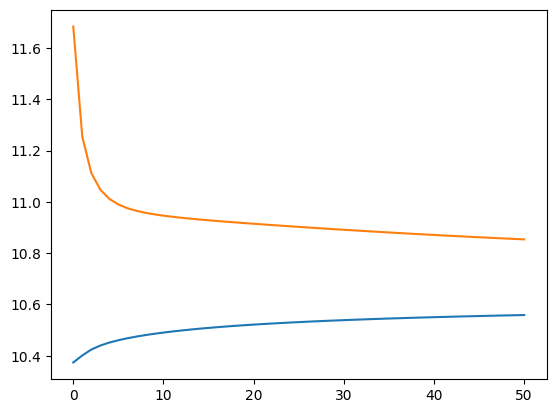

In [20]:
# Vaš kôd ovdje
assert(size(X_2a) == 50)
assert(size(y_2a) == 50)

X_train, X_test, y_train, y_test = train_test_split(X_2a, y_2a, test_size=0.5, random_state=42)
assert(size(X_train) == 25)
assert(size(X_test) == 25)

d = 10
lambda_list = [i for i in range(51)]

E_train_list = list()
E_test_list = list()

for lam in lambda_list:
    poly = PolynomialFeatures(degree=d)    
    phi_train = poly.fit_transform(X_train.reshape(-1, 1))
    phi_test = poly.fit_transform(X_test.reshape(-1, 1))
    
    # w (from train)
    prod1 = np.dot(np.transpose(phi_train), phi_train)
    prod2 = np.dot(lam, np.eye(d+1))
    prod3 = np.dot(linalg.inv(prod1 + prod2), np.transpose(phi_train))
    w_train = np.dot(prod3, y_train)
        
    # h (x = phi)
    h_train = np.dot(phi_train, w_train)
    h_test = np.dot(phi_test, w_train)
    
    # E
    E_train = np.log(mean_squared_error(y_train, h_train))
    E_train_list.append(E_train)
    E_test = np.log(mean_squared_error(y_test, h_test))
    E_test_list.append(E_test)

# show results
plt.plot(lambda_list, E_train_list, E_test_list)

### 5. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [21]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=5$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

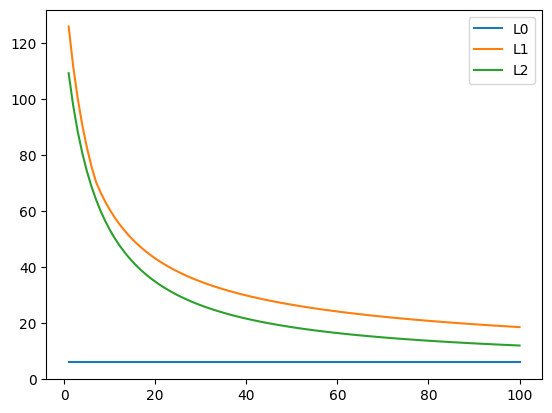

In [22]:
from sklearn.linear_model import Ridge
# Vaš kôd ovdje

lambda_list = [i for i in range(1, 101)]
d = 5

X_train, X_test, y_train, y_test = train_test_split(X_2a, y_2a, test_size=0.5, random_state=42)

phi_train = PolynomialFeatures(d).fit_transform(X_train.reshape(-1,1))

def L0_norma(w):
    return nonzeroes(w)

def L1_norma(w):
    return sum(abs(w))

def L2_norma(w):
    return math.sqrt(np.dot(w.T, w))


L0 = list()
L1 = list()
L2 = list()

for i in lambda_list:
    w = np.dot(np.dot(np.linalg.inv(np.dot(phi_train.T, phi_train) + np.dot(i, np.eye(d+1))), phi_train.T), y_train)
    
    L0.append(L0_norma(w))
    L1.append(L1_norma(w))
    L2.append(L2_norma(w))
    
plot(lambda_list, L0, lambda_list, L1, lambda_list, L2)
legend(['L0', 'L1', 'L2'], loc = 'best')

### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

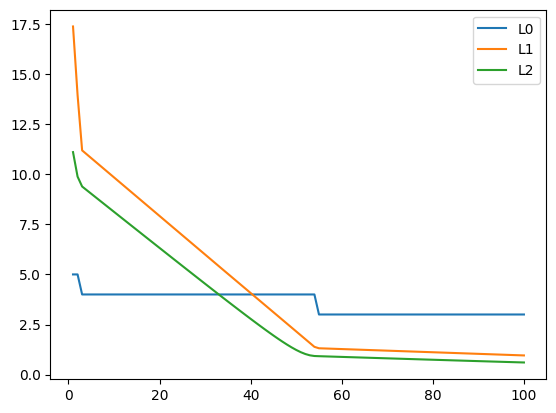

In [23]:
from sklearn.linear_model import Lasso
# Vaš kôd ovdje

L0 = list()
L1 = list()
L2 = list()

for i in lambda_list:
    l = Lasso(alpha = i).fit(phi_train, y_train)
    w = l.coef_
    
    L0.append(L0_norma(w))
    L1.append(L1_norma(w))
    L2.append(L2_norma(w))

plot(lambda_list, L0, lambda_list, L1, lambda_list, L2)
legend(['L0', 'L1', 'L2'], loc = 'best')

### 6. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [24]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

### a)

Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

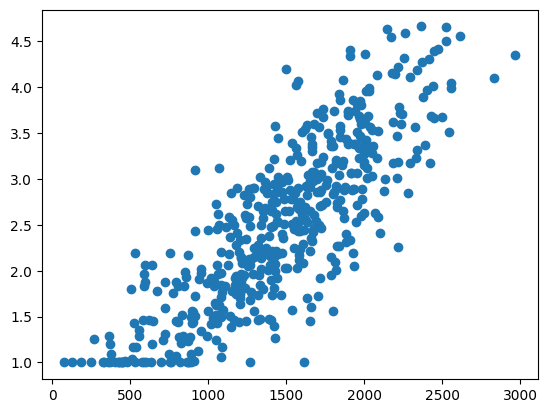

In [25]:
# Vaš kôd ovdje
plot(grades_X[:,0], grades_y,'o')

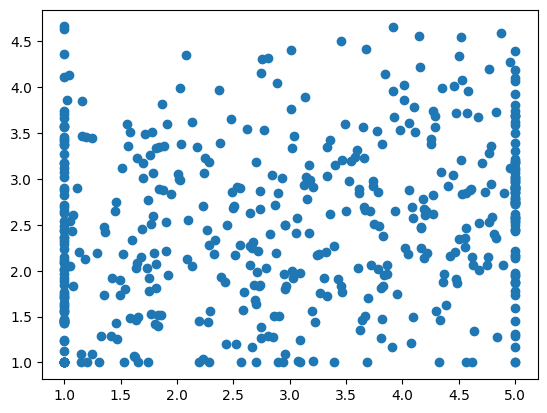

In [26]:
plot(grades_X[:,1], grades_y,'o')

### b)

Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

In [27]:
# Vaš kôd ovdje
alpha = 0.01

ridge = Ridge(alpha=alpha)
fitted = ridge.fit(grades_X, grades_y)
print(f"alpha={alpha}, w: {fitted.intercept_}, {fitted.coef_}")

alpha=0.01, w: 0.15061179575776018, [0.00141497 0.09477276]


Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [28]:
from sklearn.preprocessing import StandardScaler
# Vaš kôd ovdje
alpha = 0.01

grades_X_fixed = StandardScaler().fit_transform(grades_X)
grades_y_fixed = StandardScaler().fit_transform(grades_y.reshape(-1, 1))

ridge = Ridge(alpha=alpha)
fitted = ridge.fit(grades_X_fixed, grades_y_fixed)
print(f"alpha={alpha}, w: {fitted.intercept_}, {fitted.coef_}")

alpha=0.01, w: [8.62551331e-17], [[0.81630375 0.15167761]]


**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 7. Multikolinearnost

### a)

Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [29]:
# Vaš kôd ovdje
grades_X_fixed_colinear = np.insert(grades_X_fixed, 2, grades_X_fixed[:,1], axis=1)

Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [30]:
# Vaš kôd ovdje
ridge = Ridge(alpha=alpha)
fitted = ridge.fit(grades_X_fixed_colinear, grades_y_fixed)
print(f"alpha={alpha}, w: {fitted.intercept_}, {fitted.coef_}")

alpha=0.01, w: [8.6255971e-17], [[0.81630364 0.07583957 0.07583957]]


**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

### b)

Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [31]:
# Vaš kôd ovdje
alpha_list = [0.01, 1000]

for alpha in alpha_list:
    
    std_col1 = list()
    std_col2 = list()
    std_col3 = list()
    
    for i in range(10):
        
        rand_indexes = np.random.randint(500, size = 250)
        
        ridge = Ridge(alpha=alpha)
        fitted = ridge.fit(grades_X_fixed_colinear[rand_indexes, :], grades_y_fixed[rand_indexes, :])
        w = fitted.coef_
        print(f"alpha: {alpha} w: {w}")
        
        std_col1.append(w[0][0])
        std_col2.append(w[0][1])
        std_col3.append(w[0][2])
        
    std1 = np.std(std_col1)
    std2 = np.std(std_col2)
    std3 = np.std(std_col3)
    print(f"alpha: {alpha} stddev: {std1}")
    print(f"alpha: {alpha} stddev: {std2}")
    print(f"alpha: {alpha} stddev: {std3}")
        



alpha: 0.01 w: [[0.78442614 0.05798842 0.05798842]]
alpha: 0.01 w: [[0.84185496 0.10853086 0.10853086]]
alpha: 0.01 w: [[0.80028869 0.09258294 0.09258294]]
alpha: 0.01 w: [[0.84406406 0.0516362  0.0516362 ]]
alpha: 0.01 w: [[0.78971539 0.07886073 0.07886073]]
alpha: 0.01 w: [[0.80237957 0.06556442 0.06556442]]
alpha: 0.01 w: [[0.84263554 0.06199831 0.06199831]]
alpha: 0.01 w: [[0.84846728 0.07953089 0.07953089]]
alpha: 0.01 w: [[0.807097   0.08006777 0.08006777]]
alpha: 0.01 w: [[0.90488057 0.06472009 0.06472009]]
alpha: 0.01 stddev: 0.034927436029391336
alpha: 0.01 stddev: 0.016390085868643166
alpha: 0.01 stddev: 0.016390085868518332
alpha: 1000 w: [[0.17953569 0.02645207 0.02645207]]
alpha: 1000 w: [[0.15713167 0.02377327 0.02377327]]
alpha: 1000 w: [[0.18641094 0.03830767 0.03830767]]
alpha: 1000 w: [[0.16428308 0.036955   0.036955  ]]
alpha: 1000 w: [[0.15555738 0.03711049 0.03711049]]
alpha: 1000 w: [[0.15816873 0.04208526 0.04208526]]
alpha: 1000 w: [[0.15528372 0.02424909 0.0242

**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.